# Regular Genomics Project **RNA Localisation**


In [1]:
from keras.optimizers import Nadam, SGD
from keras.losses import KLDivergence

from plotting import plot_line_graph
from metrics import pearson
from models import CNN
from utils import prepare_data, set_variables

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [ ]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'derivativeRNATrack1'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

In [ ]:
model = CNN(input_size=(max_seq_len, 4),
            params_model=params_model,
            optimizer=SGD(learning_rate=1e-4),
            loss=KLDivergence(),
            metrics=[pearson]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [ ]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train)

Epoch 1/10
311/311 [==============================] - 98s 301ms/step - loss: 0.2036 - pearson: 0.0333 - val_loss: 0.1949 - val_pearson: 0.0497
Epoch 2/10
311/311 [==============================] - 99s 307ms/step - loss: 0.2003 - pearson: 0.0339 - val_loss: 0.1924 - val_pearson: 0.0566
Epoch 3/10
311/311 [==============================] - 98s 302ms/step - loss: 0.1972 - pearson: 0.0370 - val_loss: 0.1905 - val_pearson: 0.0613
Epoch 4/10
311/311 [==============================] - ETA: 0s - loss: 0.1947 - pearson: 0.0438

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/multiprocessing/spawn.py", line 120, in spawn_main
Process Keras_worker_SpawnPoolWorker-24:
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/multiprocessing/spawn.py", line 130, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages/keras/__init__.py", line 3, in <module>
    from keras import __internal__
  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages/keras/__internal__/__init__.py", line 3, in <module>
Traceback (most recent call last):
    from keras.__internal__ import backend
  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages

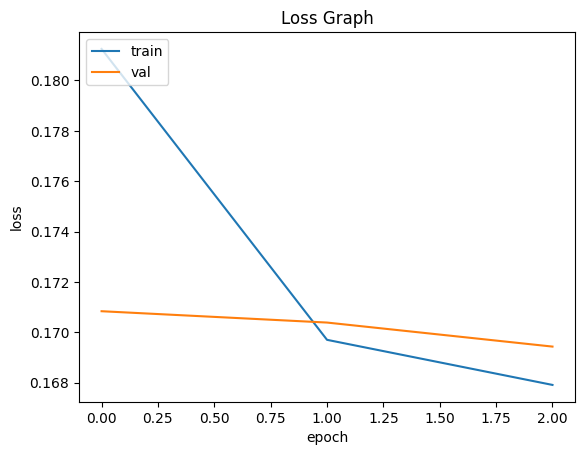

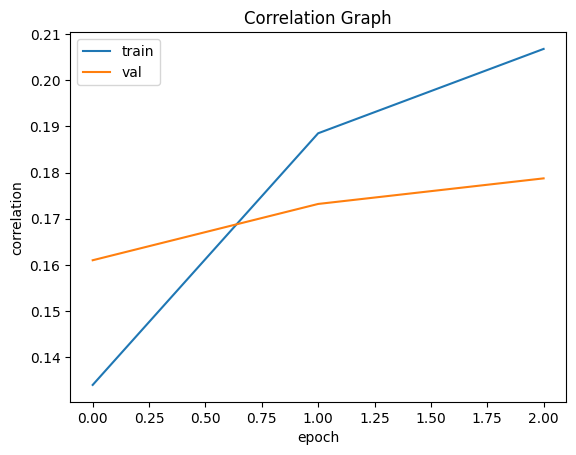

In [7]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

plt_data = [history.history['pearson'], history.history['val_pearson']]
plot_line_graph(plt_data, "Correlation Graph", 'correlation', 'epoch', ['train', 'val'])

In [8]:
model.print_model(model_architecture_path)
model.save_model(model_output_path)